<a href="https://colab.research.google.com/github/patrick-seib/econ-416/blob/master/416_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statistics
import statsmodels
from google.colab import drive
from matplotlib import pyplot as plt
drive.mount('/content/drive/')
xls = pd.ExcelFile('/content/drive/My Drive/416_Data/dataEP3.xlsx')
df_total = pd.read_excel(xls)

df_risk_free = pd.read_excel(xls, 'Risk-Free Returns')
df_market_returns = pd.read_excel(xls, 'Market Returns')
df_portfolio_returns = pd.read_excel(xls, 'Portfolio Returns')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [163]:
df_market_returns.Return /= 100

In [164]:
df_risk_free.Return /= 100

In [165]:
for x in range(1, 10):
  df_portfolio_returns.iloc[:,x] /= 100

Calculating the mean, standard deviation and autocorrelation of both
the market return and the risk-free rate. Produce a figure (plot) showing the
value of your investment if you invested 1 in stocks in 1970, or in T-bills in 
Produce another figure, if you invested 1 in 2000 in stocks vs. T-bills.
(Note: you need to accumulate the returns to take into account compounding,
i.e. if you invest 1 on 1/1/1970 you have 1 × (1 + r1970,Jan) on 2/1/1970, and
1 × (1 + r1970,Jan) × (1 + r1970,F eb) on 3/1/1970, etc.)

Risk-Free Returns
 Mean: 0.04645333333333333
 Standard Deviation: 0.03395581763814089
 Auto-Correlation: 
[1.         0.98960979 0.97359474 0.95933897 0.94679999 0.93457743
 0.92175524 0.91220394 0.90556331 0.89710178 0.88454547 0.87063121
 0.85707558 0.84581316 0.83385805 0.81946763 0.80597851 0.79208115
 0.77647391 0.75861246 0.74140814 0.72858227 0.71890131 0.70980495
 0.70094017 0.69323753 0.68610999 0.67714304]


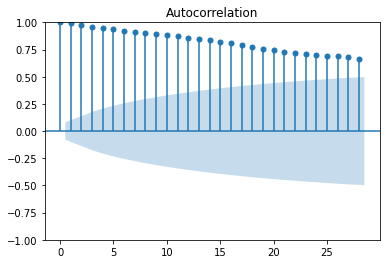

In [90]:
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

def get_mean_std_autocorr(series):
  series_list = series.to_list()
  mean = statistics.mean(series_list)
  std = statistics.stdev(series_list)
  autocorrelation = sm.tsa.acf(series)

  plot_acf(series)
  print(" Mean: " + str(mean) + "\n Standard Deviation: " + str(std) + "\n Auto-Correlation: \n" + str(autocorrelation))

risk_free_returns = df_risk_free.Return
print("Risk-Free Returns")
get_mean_std_autocorr(risk_free_returns)

Market Returns
 Mean: 0.009191911666666667
 Standard Deviation: 0.04482400085744963
 Auto-Correlation: 
[ 1.00000000e+00  6.36737014e-02 -3.67976273e-02  2.15569673e-02
 -9.45795128e-04  5.11679224e-02 -6.95714933e-02 -7.74738084e-03
  3.17433900e-03 -4.16632287e-02  3.23409085e-02 -1.40691793e-02
  2.62177451e-02 -1.99845210e-02 -7.16668085e-02  1.47219224e-02
  3.24407399e-03  2.56355159e-02 -3.39036942e-02  1.11773716e-02
 -4.18833986e-02 -4.32250908e-02 -3.43426094e-02 -2.69619711e-02
 -6.79127521e-03 -8.82346519e-03  5.57214641e-03  1.31212049e-02]


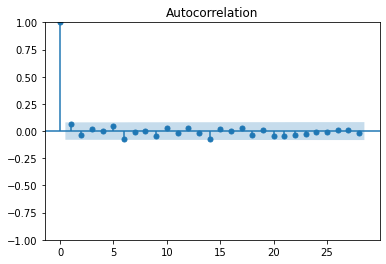

In [91]:
print("Market Returns")
get_mean_std_autocorr(df_market_returns.Return)

Showing the value of a $1 investment in risk-free assets.

In [95]:
def multiply_by_all_elements_in_series(series, variable):
  series_list = series.to_list()
  for x in series_list:
    percent = 1 + x
    if percent != 0:
      variable = variable * percent
  print(variable)

dollar_val = 1
multiply_by_all_elements_in_series(df_risk_free.Return, 1)

497245957658.3508


And the Market Returns

In [96]:
multiply_by_all_elements_in_series(df_market_returns.Return, 1)

132.4193435635302


x − 2σ/√
T and x + 2σ/√T

In [97]:
import math
def std_error_bands(series):
  series_list = series.to_list()
  mean = statistics.mean(series_list)
  print("Expected Return: " + str(mean))
  std = statistics.stdev(series_list)
  lower_bound = mean - (2*(std)/math.sqrt(series.count()))
  upper_bound = mean + (2*(std)/math.sqrt(series.count()))
  print("Upper Bound: " + str(upper_bound) + "\nLower Bound: " + str(lower_bound))

df_risk_free.Return.count()

print("- First the Risk-Free Returns")
std_error_bands(df_risk_free.Return)
print("- Then the Market Returns")
std_error_bands(df_market_returns.Return)

- First the Risk-Free Returns
Expected Return: 0.04645333333333333
Upper Bound: 0.049225814233748076
Lower Bound: 0.04368085243291859
- Then the Market Returns
Expected Return: 0.009191911666666667
Upper Bound: 0.012851776011027575
Lower Bound: 0.0055320473223057585


Now for each of the 10 portfolios.

In [98]:
for x in range(1, 10):
  print("Portfolio " + str(x))
  std_error_bands(df_portfolio_returns.iloc[:,x])

Portfolio 1
Expected Return: 0.009981833333333334
Upper Bound: 0.015039360792019311
Lower Bound: 0.004924305874647357
Portfolio 2
Expected Return: 0.0104685
Upper Bound: 0.015650370492313527
Lower Bound: 0.005286629507686474
Portfolio 3
Expected Return: 0.011191333333333333
Upper Bound: 0.016112019993314155
Lower Bound: 0.0062706466733525095
Portfolio 4
Expected Return: 0.010664
Upper Bound: 0.015414236830226333
Lower Bound: 0.0059137631697736654
Portfolio 5
Expected Return: 0.010965
Upper Bound: 0.015569226077645177
Lower Bound: 0.006360773922354824
Portfolio 6
Expected Return: 0.01077
Upper Bound: 0.015095658586119897
Lower Bound: 0.006444341413880103
Portfolio 7
Expected Return: 0.010926666666666666
Upper Bound: 0.015196821655888863
Lower Bound: 0.006656511677444469
Portfolio 8
Expected Return: 0.010670666666666667
Upper Bound: 0.014818599278189067
Lower Bound: 0.006522734055144267
Portfolio 9
Expected Return: 0.010091666666666667
Upper Bound: 0.013898756059102301
Lower Bound: 0.006

Also compute the volatility of each
portfolio, and the Sharpe ratio E (ri − rf ) /σ (ri). Summarize these results

In [99]:
for x in range(1, 10):
  print("Portfolio " + str(x))
  variance = df_portfolio_returns.iloc[:,x].var()
  print("Variance is " + str(variance))

Portfolio 1
Variance is 0.003836787599304396
Portfolio 2
Variance is 0.004027767269866444
Portfolio 3
Variance is 0.0036319735808569838
Portfolio 4
Variance is 0.0033847124914858097
Portfolio 5
Variance is 0.0031798346661101834
Portfolio 6
Variance is 0.002806698330550918
Portfolio 7
Variance is 0.0027351335447968832
Portfolio 8
Variance is 0.002580801742459655
Portfolio 9
Variance is 0.002174089446299388


 Sharpe ratio E (ri − rf ) /σ (ri)

In [100]:
def get_sharpe_ratio(portfolio_with_risk, portfolio_risk_free):
  risk_list = portfolio_with_risk.to_list()
  no_risk_list = portfolio_risk_free.to_list()

  r_i = statistics.mean(risk_list)
  r_f = statistics.mean(no_risk_list)
  std_ri = statistics.stdev(risk_list)

  s_ratio = (r_i - r_f) / std_ri
  print("Sharpe Ratio is " + str(s_ratio))


for x in range(1, 10):
  print("Portfolio " + str(x))
  #variance = statistics.variance(df_portfolio_returns.iloc[:,x])
  get_sharpe_ratio(df_portfolio_returns.iloc[:,x], df_risk_free.Return)
  #print("Variance is " + str(variance))

Portfolio 1
Sharpe Ratio is -0.5888026371495481
Portfolio 2
Sharpe Ratio is -0.5670055518659424
Portfolio 3
Sharpe Ratio is -0.5851074133784752
Portfolio 4
Sharpe Ratio is -0.6151665557895358
Portfolio 5
Sharpe Ratio is -0.6293370990225112
Portfolio 6
Sharpe Ratio is -0.6735464457657375
Portfolio 7
Sharpe Ratio is -0.6793055975323276
Portfolio 8
Sharpe Ratio is -0.7043611294130125
Portfolio 9
Sharpe Ratio is -0.779839227551549


(c) Compute the beta of each portfolio. Hint: you can use the definition of β as
Cov (ri, rm) /Var (rm).

In [119]:
import statistics
import numpy as np

def compute_beta(portfolio, market):
  portfolio_list = portfolio.to_list()
  market_list = market.to_list()
  cov = np.corrcoef(portfolio_list, market_list)[0,1]
  var = statistics.variance(market_list)
  beta = cov/var
  return beta

for x in range(1, 10):
  print("Portfolio " + str(x))
  returned = compute_beta(df_portfolio_returns.iloc[:,x], df_market_returns.Return)
  print("Beta with the market is: " + str(returned))

Portfolio 1
Beta with the market is: 389.8071694031089
Portfolio 2
Beta with the market is: 420.93205070044945
Portfolio 3
Beta with the market is: 439.6752246217351
Portfolio 4
Beta with the market is: 445.60349532603607
Portfolio 5
Beta with the market is: 457.9680243266665
Portfolio 6
Beta with the market is: 466.03140408689165
Portfolio 7
Beta with the market is: 475.3021400999367
Portfolio 8
Beta with the market is: 480.1131494441079
Portfolio 9
Beta with the market is: 485.54315456716887


Produce a figure where the x-axis is the beta, and the y-axis the mean excess return E (ri − rf ). Discuss how well the CAPM fits these data

Beta with the market is: 389.8071694031089
Beta with the market is: 420.93205070044945
Beta with the market is: 439.6752246217351
Beta with the market is: 445.60349532603607
Beta with the market is: 457.9680243266665
Beta with the market is: 466.03140408689165
Beta with the market is: 475.3021400999367
Beta with the market is: 480.1131494441079
Beta with the market is: 485.54315456716887


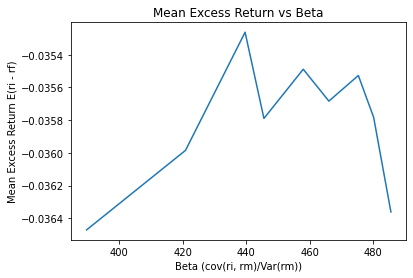

In [123]:
betas = []
for x in range(1,10):
  variable = compute_beta(df_portfolio_returns.iloc[:,(x)], df_market_returns.Return)
  betas.append(variable)

mean_excess_returns = []
for i in range(1, 10):
  temp = df_portfolio_returns.iloc[:,i]
  x = statistics.mean(temp)
  y = df_risk_free.Return.mean()
  variable = x - y
  mean_excess_returns.append(variable)

plt.plot(betas, mean_excess_returns)
plt.xlabel('Beta (cov(ri, rm)/Var(rm))')
plt.ylabel('Mean Excess Return E(ri - rf)')
plt.title('Mean Excess Return vs Beta')
plt.show()

The CAPM model seems to fit parts of the data very well, but other parts, particularly at the end of the distribution, seem to fall apart.

Another test of the CAPM is to check if the intercept i is significant in the timeseries regression:
rit − rf t = αi + βi (rmt − rf t) + εit

In [172]:
import statsmodels.api as sm
from datetime import datetime

for i in range(1,10):
  X = (df_portfolio_returns.iloc[:,i] - df_risk_free.Return)
  y = []
  for j in df_risk_free.Return.index:
    y.append(j)
  X = sm.add_constant(X)

  model = sm.OLS(y, X).fit()
  print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     77.05
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           1.74e-17
Time:                        02:05:05   Log-Likelihood:                -3907.7
No. Observations:                 600   AIC:                             7819.
Df Residuals:                     598   BIC:                             7828.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        329.2169      7.477     44.032      0.0

The formula is called the Markowitz mean-variance optimization. It is a portfolio optimization technique that helps investors maximize expected returns for a given level of risk by selecting the proportions of various assets in their portfolios. The optimal allocation among N risky assets can be calculated using this formula if the variance matrix is Ω and the vector of mean excess returns is ¯r. 

The formula to create a variance covariance matrix is as follows – Where, k = number of stocks in the portfolio n = number of observations X = this is the n x k excess return matrix.

In [179]:
!pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [178]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df_portfolio_returns.Portfolio1)
S = risk_models.sample_cov(df_portfolio_returns.Portfolio1)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

/usr/local/lib/python3.9/dist-packages/pypfopt/expected_returns.py:136: RuntimeWarning: prices are not in a dataframe
  warnings.warn("prices are not in a dataframe", RuntimeWarning)
/usr/local/lib/python3.9/dist-packages/pypfopt/risk_models.py:165: RuntimeWarning: data is not in a dataframe
  warnings.warn("data is not in a dataframe", RuntimeWarning)


ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


SolverError: ignored